In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme()
from datetime import datetime
from tqdm import tqdm
import ast
import geopandas
import folium
import branca

netflix = pd.read_csv("Netflix_cleaned_1.csv")
hulu = pd.read_csv("Hulu_cleaned_1.csv")
hulu_f = pd.read_csv('Hulu_for_difference.csv')


In [112]:
# netflix['country_cleaned'] = netflix['country'].apply(lambda x: x.split(',') if pd.notna(x) else x)

# countries = []
# for i in range(len(netflix)):
#     try:
#         if len(netflix['country_cleaned'][i]) == 1:
#             countries.append(netflix['country_cleaned'][i][0])
#         else:
#             countries.append("Multi-Country")
#     except:
#         countries.append(np.nan)

# netflix['country_cleaned_2'] = countries

# netflix.to_csv("Netflix_cleaned_1.csv", index=False)
#========================================================================================================================
# hulu['country_cleaned'] = hulu['country'].apply(lambda x: x.split(',') if pd.notna(x) else x)

# countries = []
# for i in range(len(hulu)):
#     try:
#         if len(hulu['country_cleaned'][i]) == 1:
#             countries.append(hulu['country_cleaned'][i][0])
#         else:
#             countries.append("Multi-Country")
#     except:
#         countries.append(np.nan)

# hulu['country_cleaned_2'] = countries
# hulu.to_csv("Hulu_cleaned_1.csv", index=False)

## Basic EDA

In [113]:
netflix.columns

Index(['type', 'country', 'date_added', 'month', 'day', 'year', 'release_year',
       'rating', 'duration_min', 'duration_season', 'difference', 'continent',
       'country_cleaned', 'duration', 'listed_in', 'description', 'show_id',
       'director', 'cast', 'title', 'country_cleaned_2'],
      dtype='object')

In [114]:
netflix_type = netflix.groupby(['year','type']).size().unstack()
hulu_type = hulu.groupby(['year','type']).size().unstack()

In [115]:
netflix_type.fillna(0, inplace=True)
hulu_type.fillna(0, inplace=True)

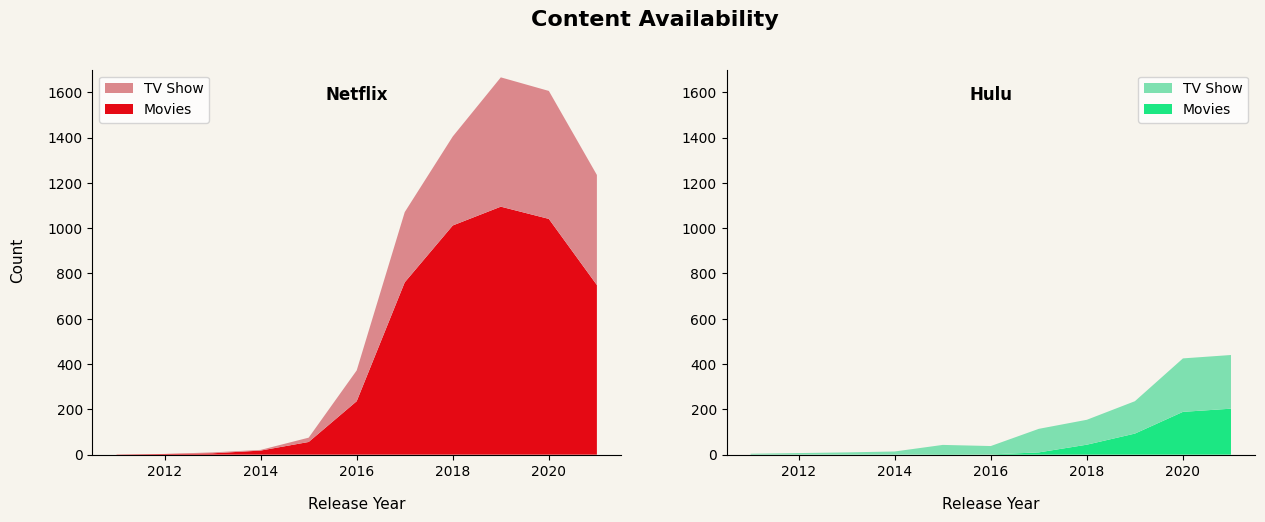

In [293]:
FONT = None
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].stackplot(netflix_type.index, netflix_type['movie'].values, netflix_type['tv show'].values, colors=['#E50914', '#db888c'], 
                labels=['Movies', 'TV Show'])
ax[1].stackplot(hulu_type.index, hulu_type['movie'].values, hulu_type['tv show'].values, colors=['#1ce783', '#7ee0b0'],
                 labels=['Movies', 'TV Show'])

ax[0].set_title("Netflix", fontsize=12, fontweight='bold', x=0.50, y=0.90)
ax[1].set_title("Hulu", fontsize=12, fontweight='bold', x=0.50, y=0.90)

# ax[0].set_xticks(netflix['release_year'].unique(), netflix['release_year'].unique(), font=FONT, fontsize=10)
ax[0].set_xlabel('Release Year', font=FONT, fontsize=11)
ax[0].xaxis.set_label_coords(0.50, -0.11)
# ax[1].set_xticks(netflix['release_year'].unique(), netflix['release_year'].unique(), font=FONT, fontsize=10)
ax[1].set_xlabel('Release Year', font=FONT, fontsize=11)
ax[1].xaxis.set_label_coords(0.50, -0.11)

fig.supylabel('Count', font=FONT, fontsize=11, x=0.07, y=0.50)
ax[0].set_ylabel(None)
ax[1].set_ylabel(None)

ax[0].set_ylim(0, 1700)
ax[1].set_ylim(0, 1700)

fig.suptitle("Content Availability", font=FONT, fontsize=16, fontweight='bold', x=0.50, y=1.0)

ax[0].legend(loc='best', reverse=True)
ax[1].legend(loc='best', reverse=True)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[0].set_facecolor(color='#f7f4ed')
ax[1].set_facecolor(color='#f7f4ed')
fig.patch.set_facecolor(color='#f7f4ed')

plt.show()

<div class="alert alert-block alert-success">

* The movies and tv shows in Netflix are very high in number compared to Hulu.

* Looking at Netflix individually, the movies are more in number compared to tv shows, whereas in Hulu, number of tv shows are a little more than movies during 2010 to 2021.

In [189]:
hulu['duration_season'].replace('na', np.nan, inplace=True)
hulu['duration_min'].replace('missing', np.nan, inplace=True)

/var/folders/hs/n_n6ry4j37s9rkkh26n8m01r0000gn/T/ipykernel_1576/3680730929.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hulu['duration_season'].replace('na', np.nan, inplace=True)
/var/folders/hs/n_n6ry4j37s9rkkh26n8m01r0000gn/T/ipykernel_1576/3680730929.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [190]:
hulu['duration_min'] = hulu['duration_min'].astype(float)
hulu['duration_season'] = hulu['duration_season'].astype(float)

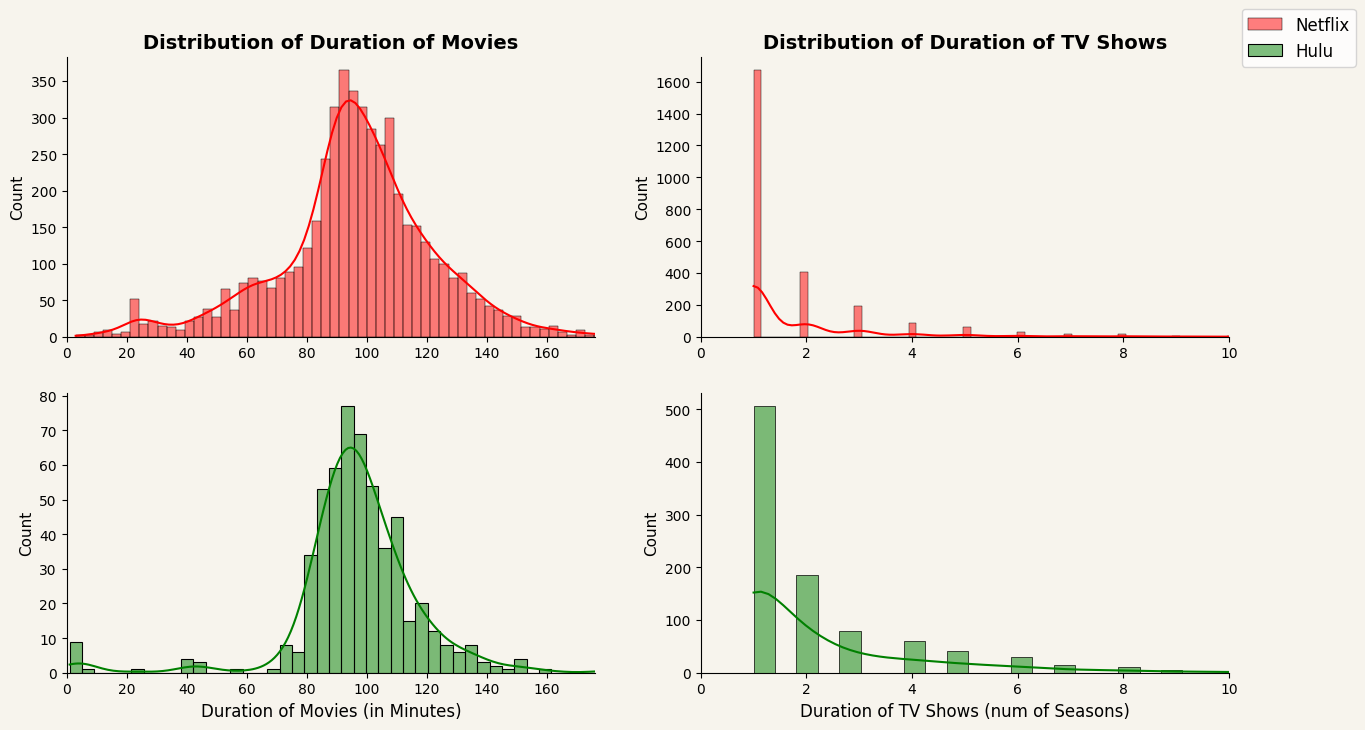

In [220]:
fig, ax = plt.subplots(2,2,figsize=(15,8))
sns.histplot(netflix['duration_min'], label='Netflix', ax=ax[0][0], color='red', kde=True)
sns.histplot(netflix['duration_season'], ax=ax[0][1], color='red', kde=True)
sns.histplot(hulu['duration_min'], label='Hulu', ax=ax[1][0], color='green', kde=True)
sns.histplot(hulu['duration_season'], ax=ax[1][1], color='green', kde=True)

ax[0][0].set_xlim(0,176)
ax[1][0].set_xlim(0,176)
ax[0][1].set_xlim(0,10)
ax[1][1].set_xlim(0,10)

ax[0][0].set_xlabel(None)
ax[1][0].set_xlabel("Duration of Movies (in Minutes)", fontsize=12)
ax[0][1].set_xlabel(None)
ax[1][1].set_xlabel("Duration of TV Shows (num of Seasons)", fontsize=12)
ax[0][0].set_ylabel("Count", fontsize=11)
ax[1][0].set_ylabel("Count", fontsize=11)
ax[0][1].set_ylabel("Count", fontsize=11)
ax[1][1].set_ylabel("Count", fontsize=11)

fig.legend(loc='upper right', bbox_to_anchor=(0.99, 0.95), fontsize=12)
ax[0][0].set_title("Distribution of Duration of Movies", fontsize=14, fontweight='bold')
ax[0][1].set_title("Distribution of Duration of TV Shows", fontsize=14, fontweight='bold')

ax[0][0].spines['top'].set_visible(False)
ax[0][1].spines['top'].set_visible(False)
ax[1][0].spines['top'].set_visible(False)
ax[1][1].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)
ax[1][0].spines['right'].set_visible(False)
ax[1][1].spines['right'].set_visible(False)


ax[0][0].set_facecolor(color='#f7f4ed')
ax[0][1].set_facecolor(color='#f7f4ed')
ax[1][0].set_facecolor(color='#f7f4ed')
ax[1][1].set_facecolor(color='#f7f4ed')
fig.patch.set_facecolor(color='#f7f4ed')

plt.show()

<div class="alert alert-block alert-success">

* From the content acquired by Netflix and Hulu, the average duration of movies is 90-100 minutes while the average number of seasons in TV shows are 1-2.

In [54]:
max(hulu['duration_min']), min(hulu['duration_min'])

('missing', '1')

# 1.

<div class="alert alert-block alert-warning">

1. Trend of how long does netflix take to add on the show of past vs current

In [2]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], format='%Y-%m-%d')
hulu_f['date_added'] = pd.to_datetime(hulu_f['date_added'], format='%Y-%m-%d')

In [3]:
netflix.head(2)

,type,country,date_added,month,day,year,release_year,rating,duration_min,duration_season,...,continent,country_cleaned,duration,listed_in,description,show_id,director,cast,title,country_cleaned_2
0,movie,united states,2021-09-25,9,25,2021,2020,pg-13,90.0,NaN,...,north america,['united states'],90 min,documentaries,"as her father nears the end of his life, filmm...",s1,kirsten johnson,missing,dick johnson is dead,united states
1,tv show,south africa,2021-09-24,9,24,2021,2021,tv-ma,NaN,2.0,...,africa,['south africa'],2 seasons,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t...",s2,missing,"ama qamata, khosi ngema, gail mabalane, thaban...",blood & water,south africa


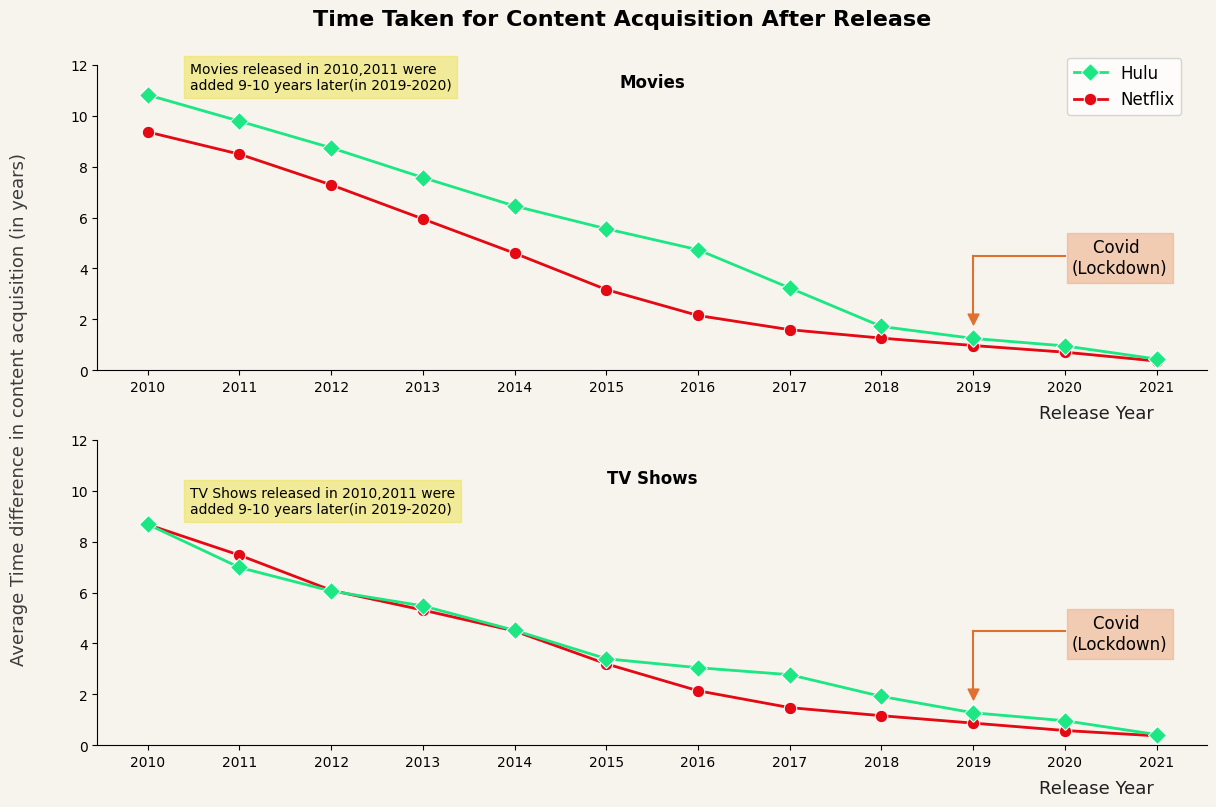

In [4]:
netflix['difference_y'] = round(netflix['difference']/12, 2)
hulu['difference_y'] = round(hulu['difference']/12, 2)
FONT=None

fig, ax = plt.subplots(2, 1, figsize=(12,8))

ax[0] = sns.lineplot(data=netflix[netflix['type']=='movie'], x='release_year', y='difference_y', marker='o', markersize=9, ax=ax[0], color='#E50914',
                     label='Netflix', linewidth=2, errorbar=('ci', False))
ax[0] = sns.lineplot(data=hulu[hulu['type']=='movie'], x='release_year', y='difference_y', marker='D', markersize=9, ax=ax[0], color='#1ce783',
                      label='Hulu', linewidth=2, errorbar=('ci', False))

ax[1] = sns.lineplot(data=netflix[netflix['type']=='tv show'], x='release_year', y='difference_y', marker='o', markersize=9, ax=ax[1], color='#E50914',
                      linewidth=2, errorbar=('ci', False))
ax[1] = sns.lineplot(data=hulu[hulu['type']=='tv show'], x='release_year', y='difference_y', marker='D', markersize=9, ax=ax[1], color='#1ce783',
                      linewidth=2, errorbar=('ci', False))

ax[0].set_title("Movies")
ax[1].set_title("TV Shows")


ax[0].set_xticks(netflix['release_year'].unique(), netflix['release_year'].unique(), font=FONT, fontsize=10)
ax[0].set_xlabel('Release Year', font=FONT, fontsize=13, color='#212020')
ax[0].xaxis.set_label_coords(0.90, -0.11)
ax[1].set_xticks(netflix['release_year'].unique(), netflix['release_year'].unique(), font=FONT, fontsize=10)
ax[1].set_xlabel('Release Year', font=FONT, fontsize=13, color='#212020')
ax[1].xaxis.set_label_coords(0.90, -0.11)
ax[0].set_ylim(0,12)
ax[1].set_ylim(0,12)

fig.supylabel('Average Time difference in content acquisition (in years)', font=FONT, fontsize=13, x=-0.01, y=0.50, color='#3d3c3c')
ax[0].set_ylabel(None)
ax[1].set_ylabel(None)

fig.suptitle("Time Taken for Content Acquisition After Release", font=FONT, fontsize=16, fontweight='bold', x=0.50, y=1.0)
ax[0].set_title("Movies", font=FONT, fontsize=12, fontweight='bold', x=0.50, y=0.90)
ax[1].set_title("TV Shows", font=FONT, fontsize=12, fontweight='bold', x=0.50, y=0.83)

ax[0].legend_.remove()
fig.legend(loc='upper right', reverse=True, bbox_to_anchor=(0.973, 0.95), fontsize=12)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[0].set_facecolor(color='#f7f4ed')
ax[1].set_facecolor(color='#f7f4ed')
fig.patch.set_facecolor(color='#f7f4ed')

fig.text(s='    Covid\n(Lockdown)', x=0.875, y=0.67, fontsize=12, bbox=dict(facecolor='#eda479', alpha=0.5, edgecolor='#eda479'))
ax[0].scatter(2019,2, marker='v', s=60, color='#e0702f')
ax[0].plot([2019,2019], [2,4.5], color='#e0702f')
ax[0].plot([2019,2020], [4.5,4.5], color='#e0702f')

fig.text(s='    Covid\n(Lockdown)', x=0.875, y=0.20, fontsize=12, bbox=dict(facecolor='#eda479', alpha=0.5, edgecolor='#eda479'))
ax[1].scatter(2019,2, marker='v', s=60, color='#e0702f')
ax[1].plot([2019,2019], [2, 4.5], color='#e0702f')
ax[1].plot([2019,2020], [4.5, 4.5], color='#e0702f')

fig.text(s='Movies released in 2010,2011 were\nadded 9-10 years later(in 2019-2020)', x=0.14, y=0.90, fontsize=10, 
         bbox=dict(facecolor='#ede245', alpha=0.5, edgecolor='#ede245'))
fig.text(s='TV Shows released in 2010,2011 were\nadded 9-10 years later(in 2019-2020)', x=0.14, y=0.37, fontsize=10, 
         bbox=dict(facecolor='#ede245', alpha=0.5, edgecolor='#ede245'))

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

Findings:

* Over the years, the time taken by Netflix and Hulu to add a Movie or TV Show to their streaming platform (i.e. time taken for content acquisition) has drastically decreased to almost less than a year from the release.

* This decreasing trend is powered by Lockdown because of Covid. The graphs show that the acquisition happenned in less than a year from 2019 (the year when Covid hit).

* An interesting finding from the plot is that, majority of the movies and tv shows that were released before covid (during the years 2010 through 2018) were added in 2019, i.e. during Covid.

* This faster acquisition rate is a very brilliant step which not only boosts their subscription rate but also the customer retention rate.

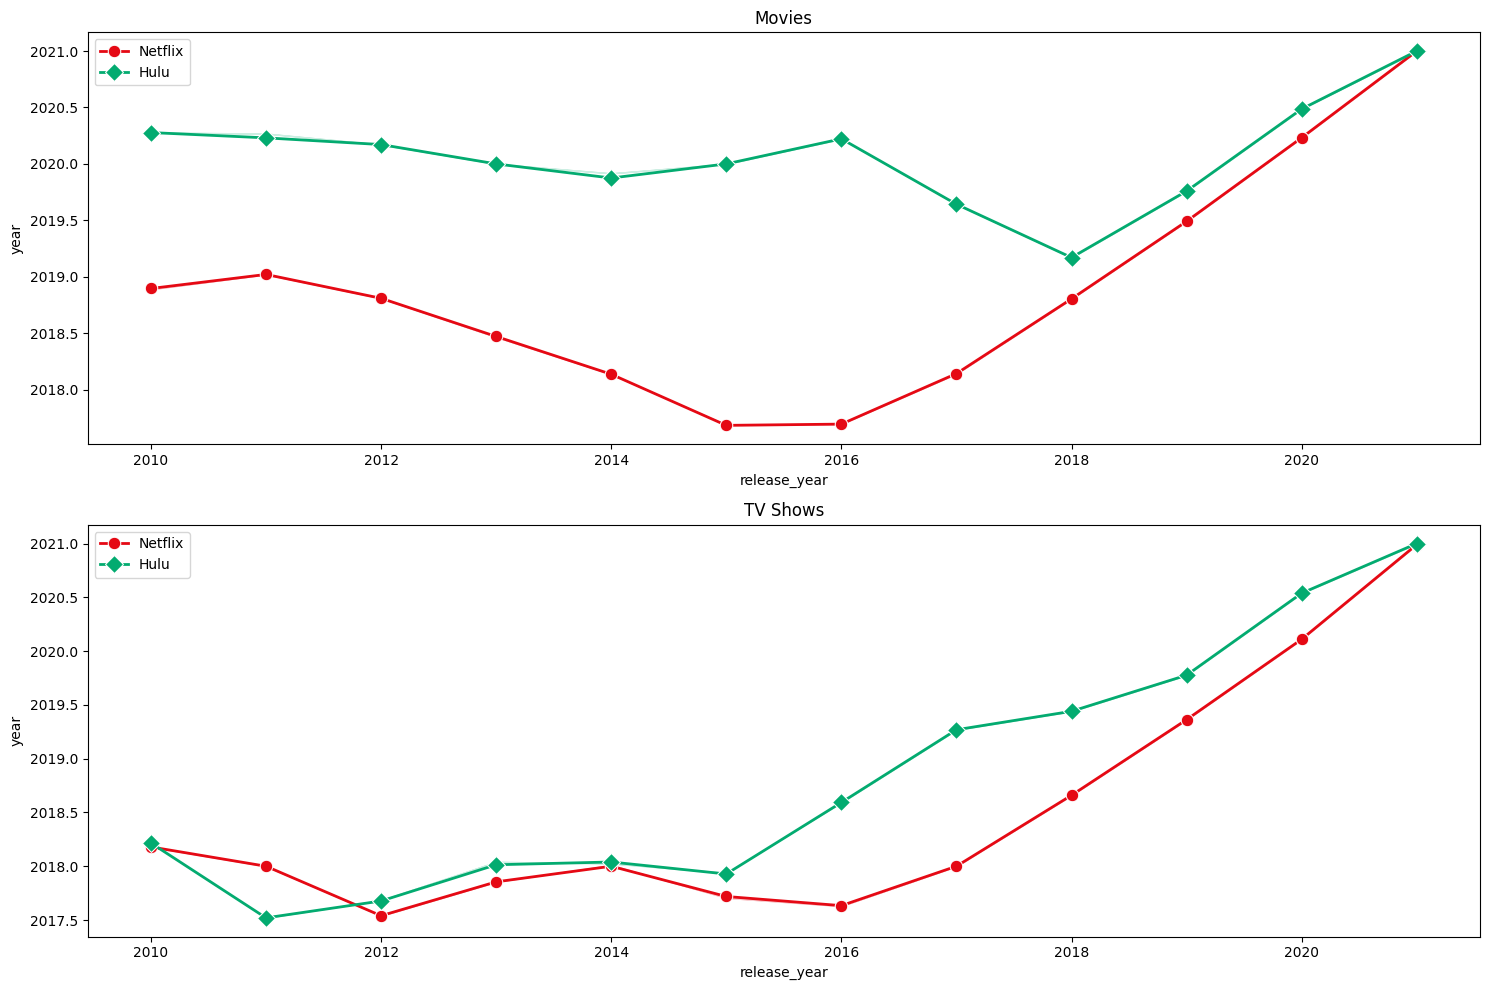

In [38]:
# SUPPLEMENT PLOT
fig, ax = plt.subplots(2, 1, figsize=(15,10))

ax[0] = sns.lineplot(data=netflix[netflix['type']=='movie'], x='release_year', y='year', marker='o', markersize=9, ax=ax[0], color='#E50914',
                     label='Netflix', linewidth=2, errorbar=('ci', False))
ax[0] = sns.lineplot(data=hulu[hulu['type']=='movie'], x='release_year', y='year', marker='D', markersize=9, ax=ax[0], color='#03ab70',
                      label='Hulu', linewidth=2, errorbar=('ci', False))

ax[1] = sns.lineplot(data=netflix[netflix['type']=='tv show'], x='release_year', y='year', marker='o', markersize=9, ax=ax[1], color='#E50914',
                      label='Netflix', linewidth=2, errorbar=('ci', False))
ax[1] = sns.lineplot(data=hulu[hulu['type']=='tv show'], x='release_year', y='year', marker='D', markersize=9, ax=ax[1], color='#03ab70',
                      label='Hulu', linewidth=2, errorbar=('ci', False))

ax[0].set_title("Movies")
ax[1].set_title("TV Shows")

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">

2. Geo plot

In [3]:
netflix.head(2)

,type,country,date_added,month,day,year,release_year,rating,duration_min,duration_season,...,continent,country_cleaned,duration,listed_in,description,show_id,director,cast,title,country_cleaned_2
0,movie,united states,2021-09-25,9,25,2021,2020,pg-13,90.0,NaN,...,north america,['united states'],90 min,documentaries,"as her father nears the end of his life, filmm...",s1,kirsten johnson,missing,dick johnson is dead,united states
1,tv show,south africa,2021-09-24,9,24,2021,2021,tv-ma,NaN,2.0,...,africa,['south africa'],2 seasons,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t...",s2,missing,"ama qamata, khosi ngema, gail mabalane, thaban...",blood & water,south africa


In [169]:
netflix_country = netflix['country_cleaned_2'].value_counts().reset_index()
netflix_country.columns = ['country', 'count']

hulu_country = hulu['country_cleaned_2'].value_counts().reset_index()
hulu_country.columns = ['country', 'count']

In [170]:
country_upd = []
for i in range(len(netflix_country)):
    if netflix_country['country'][i] == 'united states':
        country_upd.append("United States")
    else:
        w = netflix_country['country'][i].split(" ")
        w = [i[0].upper()+i[1:] for i in w]
        tmp = " ".join(w)
        country_upd.append(tmp)

netflix_country['country_upd'] = country_upd
netflix_country.drop([1,3], inplace=True)
netflix_country['percentage'] = round((netflix_country['count']/sum(netflix_country['count'].values))*100, 2)
netflix_country['count_log'] = np.log1p(netflix_country['count'])


In [171]:
country_upd = []
for i in range(len(hulu_country)):
    if hulu_country['country'][i] == 'united states':
        country_upd.append("United States")
    else:
        w = hulu_country['country'][i].split(" ")
        w = [i[0].upper()+i[1:] for i in w]
        tmp = " ".join(w)
        country_upd.append(tmp)
hulu_country['country_upd'] = country_upd
hulu_country.drop(2, inplace=True)
hulu_country['percentage'] = round((hulu_country['count']/sum(hulu_country['count'].values))*100, 2)
hulu_country['count_log'] = np.log1p(hulu_country['count'])

In [172]:
netflix_country.head()

,country,count,country_upd,percentage,count_log
0,united states,2297,United States,40.53,7.739794
2,india,773,India,13.64,6.651572
4,united kingdom,383,United Kingdom,6.76,5.950643
5,japan,201,Japan,3.55,5.308268
6,south korea,195,South Korea,3.44,5.278115



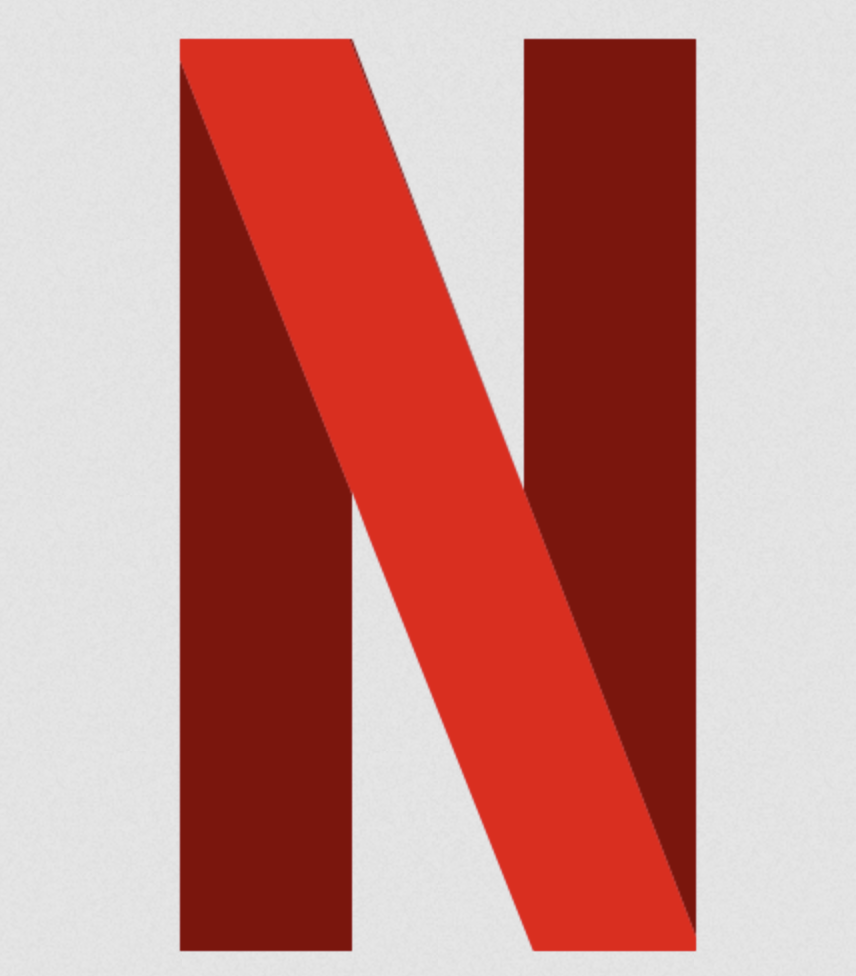
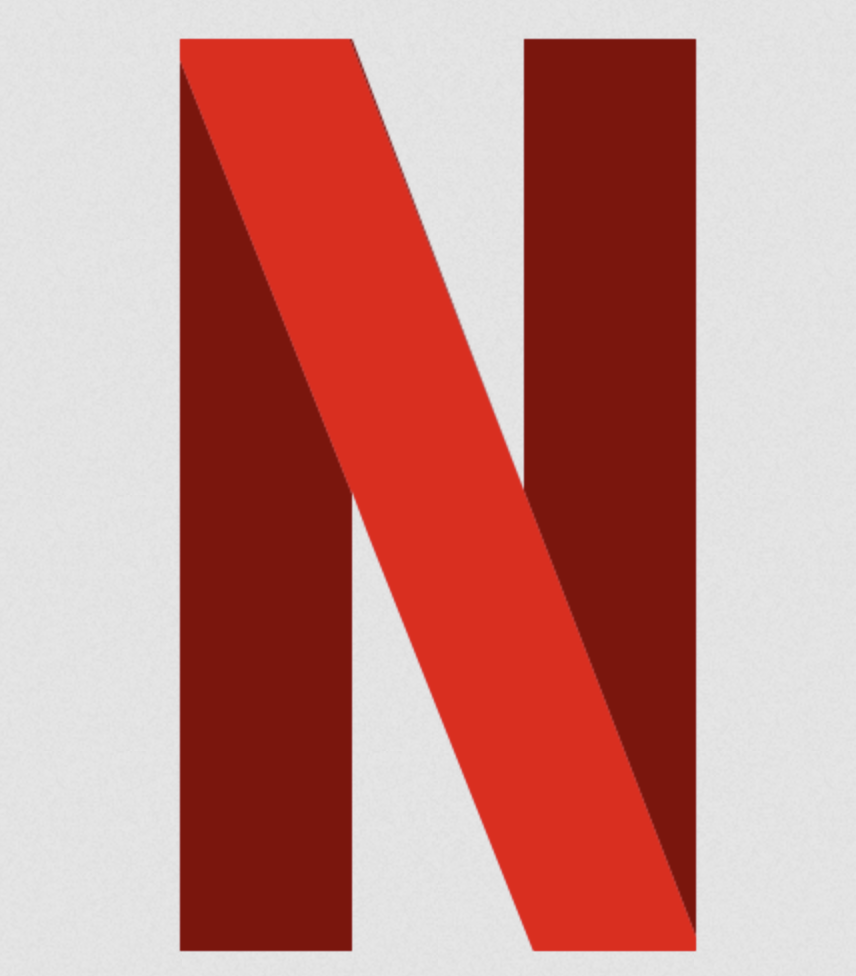
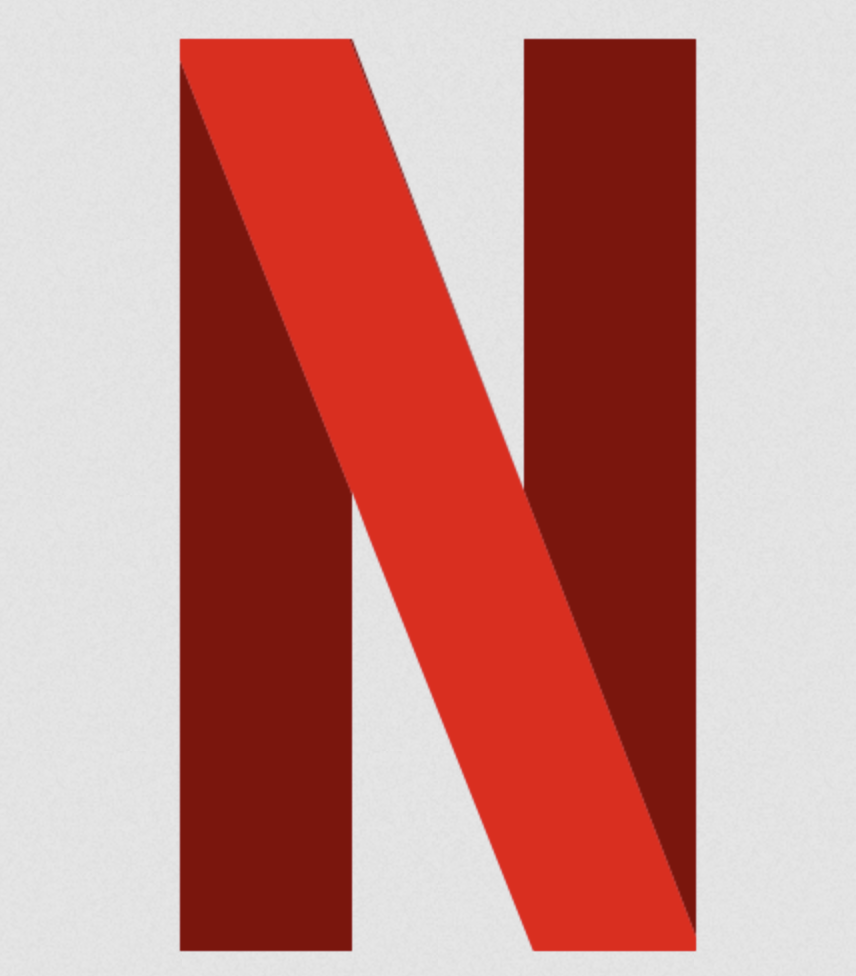

In [294]:
nf = folium.Map(location=[20, 0], zoom_start=2)
geo_json_url = 'https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson'

loc = 'Netflix - Country wise Content Production'
title_html = '''<h3 align="center" style="font-size:16px"><b>{}</b></h3>'''.format(loc)

data = [{'coord':[38, -105], 'text': "United States of America (40.53%)"},
        {'coord': [19, 78], 'text': "India (13.64%)"},
        {'coord': [53,3], 'text': 'United Kingdom (6.76%)'}]
for i in range(len(data)):
    netflix_icon = folium.features.CustomIcon('netflixicon.png', icon_size=(20,20))
    folium.Marker(data[i]['coord'], icon=netflix_icon, popup=folium.Popup(data[i]['text']),).add_to(nf)


folium.Choropleth(
    geo_data=geo_json_url,
    data=netflix_country,
    columns=['country_upd', 'count_log'],
    key_on='feature.properties.name',
    fill_color="Reds",
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Content by Country',
    highlight=True,
    nan_fill_color="#ffffff",
    nan_fill_opacity=0.7,
).add_to(nf)

nf.get_root().html.add_child(folium.Element(title_html))
# m.save('choropleth_map.html')
nf

In [86]:
hulu_country.head(5)

,country,count,country_upd,percentage,count_log
0,united states,1011,United States,74.39,6.919684
1,japan,172,Japan,12.66,5.153292
3,united kingdom,50,United Kingdom,3.68,3.931826
4,canada,32,Canada,2.35,3.496508
5,australia,11,Australia,0.81,2.484907



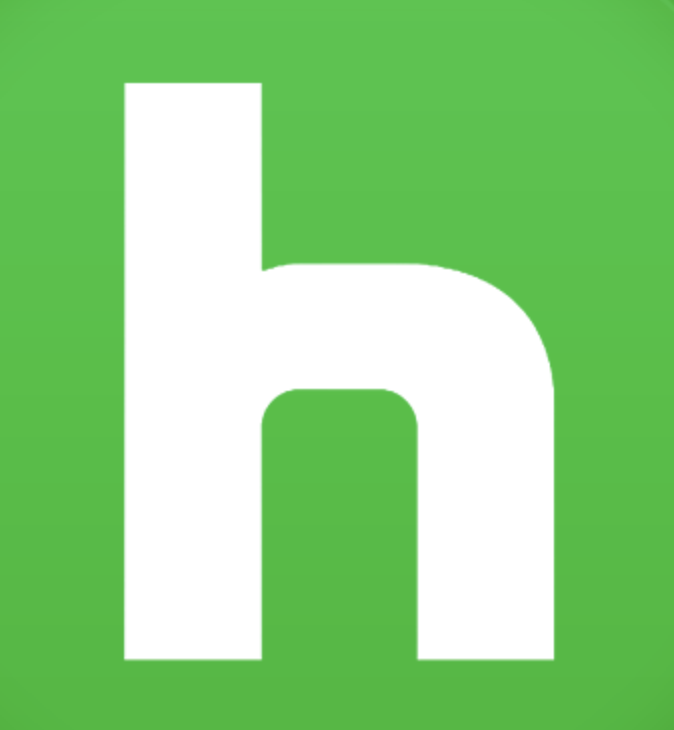
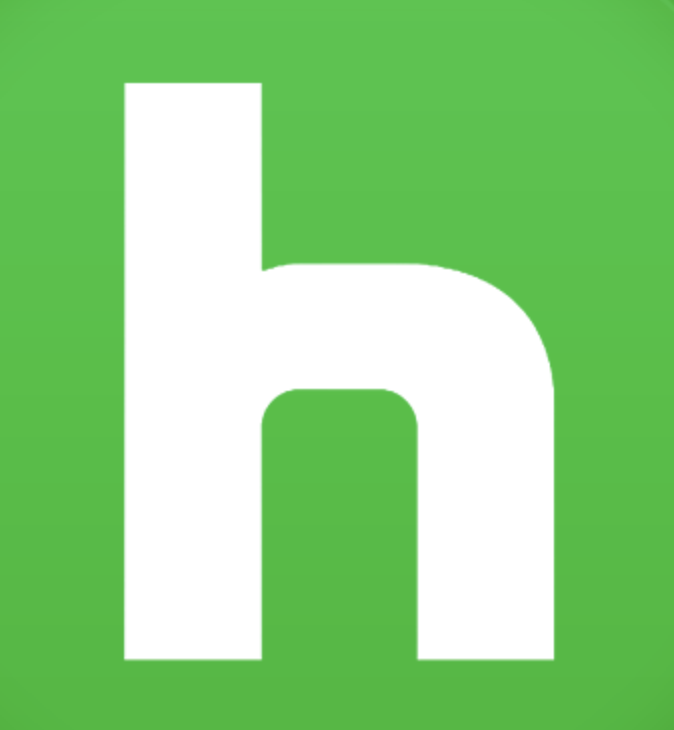
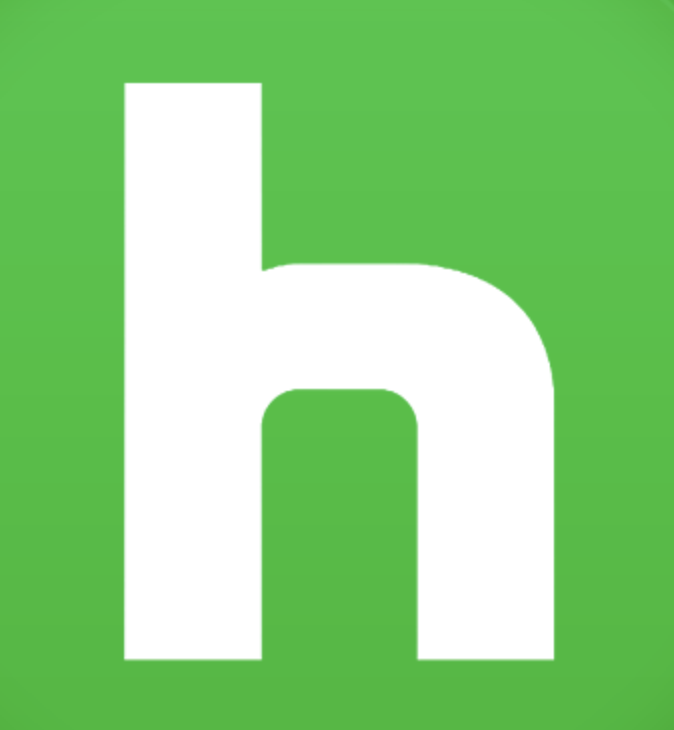

In [102]:
hl = folium.Map(location=[20, 0], zoom_start=2)
geo_json_url = 'https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson'

loc = 'Hulu - Country wise Content Production'

title_html = '''<h3 align="center" style="font-size:16px"><b>{}</b></h3>'''.format(loc)  

data = [{'coord':[38, -105], 'text': "United States of America (74.39%)", 'iconsize':(20,20)},
        {'coord': [35, 137], 'text': "Japan (12.66%)", 'iconsize':(20,20)},
        {'coord': [53,2], 'text': 'United Kingdom (3.68%)', 'iconsize':(20,20)}]
for i in range(len(data)):
    hulu_icon = folium.features.CustomIcon('huluicon.png', icon_size=data[i]['iconsize'])
    folium.Marker(data[i]['coord'], icon=hulu_icon, popup=folium.Popup(data[i]['text']),).add_to(hl)

# hulu_icon = folium.features.CustomIcon('huluicon.png', icon_size=(20,20))
# folium.Marker([53, 2], icon=hulu_icon, popup=folium.Popup("United Kingdom (3.68%)")).add_to(hl)

folium.Choropleth(
    geo_data=geo_json_url,
    data=hulu_country,
    columns=['country_upd', 'count_log'],
    key_on='feature.properties.name',
    fill_color="Greens",
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Percentage of Content by Country',
    highlight=True,
    nan_fill_color="#ffffff",
    nan_fill_opacity=0.5
).add_to(hl)

hl.get_root().html.add_child(folium.Element(title_html))
# m.save('choropleth_map.html')
hl

<div class="alert alert-block alert-success">

Findings:

* Netflix has a lot of international content and is more widespread compared to Hulu.

* Netflix has 40.53% of the content from United States and the rest from the other parts of the world with India's being second highest with 13.64% and United Kingdom's being the third highest with 6.76%.

* Whereas Hulu has 74.39% of the content from United States alone and 12.66% and 3.68% from Japan and United Kingdom respectively.

* We can conclude that Netflix has more market internationally compared to Hulu which has its majority of the market from United States.

In [48]:
n_continent_type = netflix.groupby(['continent']).count()
n_continent_type.reset_index(inplace=True)
n_continent_type.drop(3, inplace=True)
n_continent_type.sort_values('show_id', inplace=True)

In [49]:
h_continent_type = hulu.groupby(['continent']).count()
h_continent_type.reset_index(inplace=True)
h_continent_type.sort_values('show_id', inplace=True)
h_continent_type = h_continent_type.reindex([5,6,0,3,2,1,4])

In [50]:
h_continent_type

,continent,type,date_added,month,day,year,release_year,rating,duration_min,duration_season,...,country,duration,listed_in,description,show_id,director,cast,title,country_cleaned_2,difference_y
5,oceania,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,0,13,13,13
6,south america,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,0,6,6,6
0,africa,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,0,3,3,3
3,multi-continent,86,86,86,86,86,86,86,86,86,...,86,86,86,86,86,86,0,86,86,86
2,europe,110,110,110,110,110,110,110,110,110,...,110,110,110,110,110,110,0,110,110,110
1,asia,191,191,191,191,191,191,191,191,191,...,191,191,191,191,191,191,0,191,191,191
4,north america,1076,1076,1076,1076,1076,1076,1076,1076,1076,...,1076,1076,1076,1076,1076,1076,0,1076,1076,1076


In [51]:
n_continent_type

,continent,type,country,date_added,month,day,year,release_year,rating,duration_min,...,country_cleaned,duration,listed_in,description,show_id,director,cast,title,country_cleaned_2,difference_y
6,oceania,92,92,92,92,92,92,92,92,45,...,92,92,92,92,92,92,92,92,92,92
7,south america,189,189,189,189,189,189,189,189,121,...,189,189,189,189,189,189,189,189,189,189
0,africa,214,214,214,214,214,214,214,214,183,...,214,214,214,214,214,214,214,214,214,214
4,multi-continent,729,729,729,729,729,729,729,729,584,...,729,729,729,729,729,729,729,729,729,729
2,europe,1026,1026,1026,1026,1026,1026,1026,1026,612,...,1026,1026,1026,1026,1026,1026,1026,1026,1026,1026
1,asia,1781,1781,1781,1781,1781,1781,1781,1781,1203,...,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781
5,north america,2694,2694,2694,2694,2694,2694,2694,2694,1865,...,2694,2694,2694,2694,2694,2694,2694,2694,2694,2694


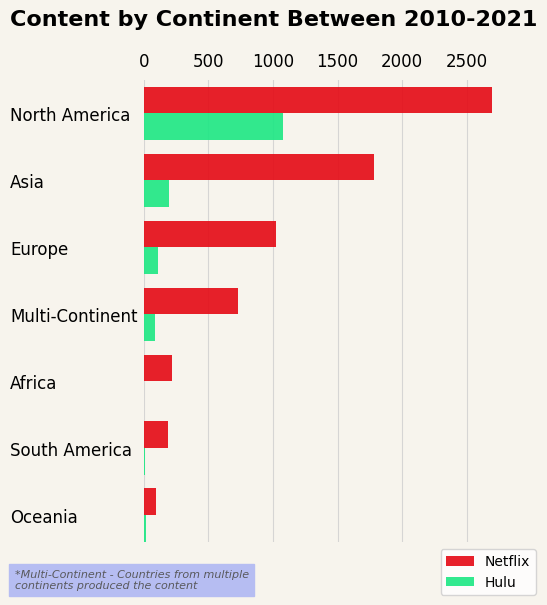

In [159]:
fig, ax = plt.subplots(figsize=(5,6))

ax.barh(np.arange(len(n_continent_type))+0.20, n_continent_type['show_id'].values, height=0.40, color='#E50914', alpha=0.9, 
        zorder=3, label='Netflix')
ax.barh(np.arange(len(h_continent_type))-0.20, h_continent_type['show_id'].values, height=0.40, color='#1ce783', alpha=0.9,
        zorder=3, label='Hulu')

ax.set_yticks(list(range(0,7)))
ax.set_yticklabels(['Oceania', 'South America', 'Africa', 'Multi-Continent', 'Europe', 'Asia', 'North America'],
                    ha='left', x=-0.32, fontsize=12)

ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.set_xlim(0,3000)
ax.set_xticks(list(range(0,2501,500)))
ax.set_xticklabels(list(range(0,2501,500)), fontsize=12)

ax.set_ylim(-0.4,6.5)

ax.set_title("Content by Continent Between 2010-2021", fontsize=16, fontweight='bold', x=0.335, y=1.1)
ax.text(s="*Multi-Continent - Countries from multiple\ncontinents produced the content", color='#59595c',
        fontsize=8, style='italic', x=-1000, y=-1.1, bbox=dict(facecolor='#b6bdf2', alpha=1, edgecolor='#b6bdf2'))

ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.tick_params(right=False)
ax.tick_params(top=False)

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

fig.patch.set_facecolor('#f7f4ed')
ax.set_facecolor('#f7f4ed')

ax.grid(axis='x', color='#d6d5d4')
plt.legend(bbox_to_anchor=(1.03, 0.0), fontsize=10)

plt.show()

<div class="alert alert-block alert-warning">

#3 Directors - ratings - cast (IGNORE)

In [221]:
netflix_ratings = pd.read_csv("netflix_with_ratings.csv")
hulu_ratings = pd.read_csv("hulu_with_ratings.csv")

In [222]:
netflix_ratings.head(2)

,type,country,date_added,month,day,year,release_year,rating,duration_min,duration_season,...,continent,country_cleaned,duration,listed_in,description,show_id,director,cast,title,imdb_rating
0,movie,united states,2021-09-25,9,25,2021,2020,pg-13,90.0,NaN,...,north america,missing,90 min,documentaries,"as her father nears the end of his life, filmm...",s1,kirsten johnson,missing,dick johnson is dead,7.1
1,tv show,south africa,2021-09-24,9,24,2021,2021,tv-ma,NaN,2.0,...,africa,missing,2 seasons,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t...",s2,missing,"ama qamata, khosi ngema, gail mabalane, thaban...",blood & water,6.8


In [223]:
netflix_ratings['imdb_rating'].replace('missing', np.nan, inplace=True)
netflix_ratings['imdb_rating'] = netflix_ratings['imdb_rating'].astype(float)

/var/folders/hs/n_n6ry4j37s9rkkh26n8m01r0000gn/T/ipykernel_1576/297107603.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_ratings['imdb_rating'].replace('missing', np.nan, inplace=True)


In [224]:
desc_len = []
for i in range(len(netflix_ratings)):
    desc_len.append(len(netflix_ratings['description'][i].split(" ")))

netflix_ratings['desc_len'] = desc_len


desc_len = []
for i in range(len(hulu_ratings)):
    desc_len.append(len(hulu_ratings['description'][i].split(" ")))

hulu_ratings['desc_len'] = desc_len

In [226]:
netflix_ratings['what'] = 'netflix'
hulu_ratings['what'] = 'hulu'

all = pd.concat([netflix_ratings, hulu_ratings])

In [237]:
# all['desc_len'].isnull().sum(), all['imdb_rating'].isnull().sum()
all.dropna(subset=['imdb_rating'], inplace=True)

In [238]:
all['desc_len'].isnull().sum(), all['imdb_rating'].isnull().sum()
# all['imdb_rating'].replace('missing', np.nan, inplace=True)

(0, 0)

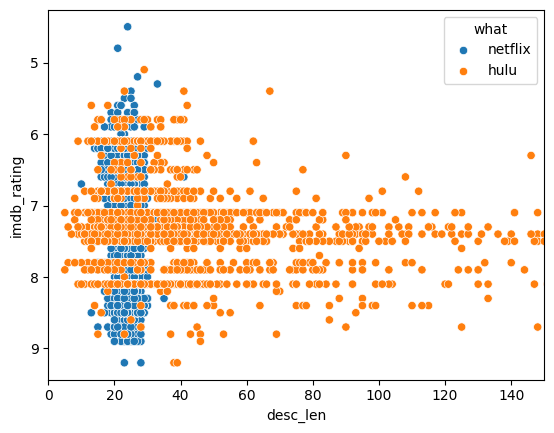

In [242]:
sns.scatterplot(data=all, x='desc_len', y='imdb_rating', hue='what')
plt.xlim(0,150)
plt.show()

* No correlation between description and ratings (just checking if there is any)

In [120]:
netflix_ratings.groupby('continent')['imdb_rating'].mean().values

array([6.91685393, 7.28160494, 7.14106383, 7.36194969, 7.14985337,
       7.22790507, 7.32666667, 7.24880952])

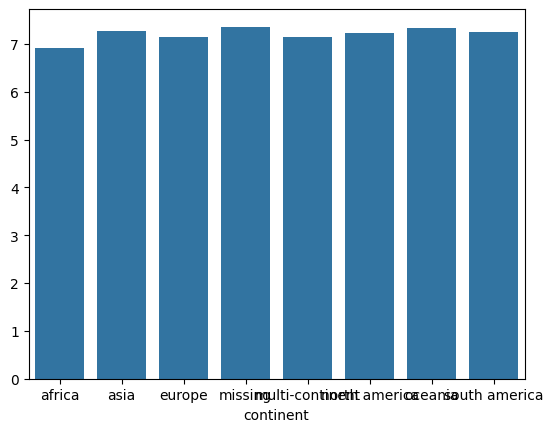

In [121]:
sns.barplot(x=netflix_ratings.groupby('continent')['imdb_rating'].mean().index, y=netflix_ratings.groupby('continent')['imdb_rating'].mean().values)
plt.show()

In [464]:
hulu_ratings.head(2)

,type,date_added,month,day,year,release_year,rating,duration_min,duration_season,difference,...,country_cleaned,country,duration,listed_in,description,show_id,director,cast,title,imdb_rating
0,movie,2021-10-23,10,23,2021,2021,pg-13,108,na,9,...,NaN,usa,108 min,"action, thriller",a hardened arizona rancher tries to protect an...,s3,missing,NaN,the marksman,6.8
1,movie,2021-10-22,10,22,2021,2021,r,97,na,9,...,NaN,south africa,97 min,horror,a forest ranger and two survivalists with a cu...,s4,missing,NaN,gaia,6.1


In [466]:
hulu_ratings['director'].value_counts()

director
missing                                                                                                                                                                       1482
director jennifer kent ("the babadook") tells the sweeping tale of a young woman's quest for revenge set in 1825 against the perilous and unforgiving terrain of tasmania.       1
director gigi saul guerrero talks through culture shock’s themes – immigration, filmmaking, and latinidad – in this one-on-one chat.                                             1
director alex winter goes inside the biggest global corruption scandal in history that was uncovered by hundreds of journalists, working in secret and at enormous risk.         1
Name: count, dtype: int64

### Getting ratings for the data

In [26]:
from dotenv import load_dotenv, dotenv_values
load_dotenv()

True

In [27]:
import os
from together import Together
api_key = os.getenv("together_api_key")
client = Together(api_key=api_key)


def get_results_from_model(titles):

    prompts = f"""You will be provided with a list of titles of movies/tv shows. 
    Your job is to give the ratings of those titles.
    These are the list of titles: {titles}
    Strictly return your response as a json where the keys are the titles and the values are the ratings. Donot include any other information.
    Follow the below response template:
    Output:
          {{
            "title1": rating1,
            "title2": rating2,
            ...
          }}
    """
    client = Together(api_key=api_key)
    response = client.chat.completions.create(
       model="meta-llama/Llama-3-70b-chat-hf",
       messages=[{"role": "user", "content": prompts}],
    )

    # Extract the selected option from the response
    response = response.choices[0].message.content.strip()
    return response

In [29]:
# global_ratings = []
# for i in tqdm(range(0,len(hulu),200)):
#     ratings = get_results_from_model(list(hulu.loc[i:i+200]['title'].values))
#     global_ratings.append(ratings)


# tmp = global_ratings[1].replace("\n","")
# tmp = tmp[tmp.index('{'): tmp.index('}')+1]


# global_list = []
# for i in global_ratings:
#     try:
#         tmp = i.replace("\n","")
#         tmp = tmp[tmp.index('{'): tmp.index('}')+1]
#         global_list.append(tmp)
#     except:
#         print(global_ratings.index(i))


# global_list__ = []
# for i in global_list:
#     try:
#         global_list__.append(ast.literal_eval(i))
#     except:
#         print(global_list.index(i))

# merged_dict = {key: val for dictionary in global_list__ for key, val in dictionary.items()}

In [28]:
# imdb_ratings = []
# for i in range(len(netflix)):
#     try:
#         imdb_ratings.append(merged_dict[netflix['title'][i]])
#     except:
#         imdb_ratings.append('missing')

# netflix['imdb_rating'] = imdb_ratings
# netflix.to_csv("netflix_with_ratings.csv", index=False)


# imdb_ratings = []
# for i in range(len(hulu)):
#     try:
#         imdb_ratings.append(merged_dict[hulu['title'][i]])
#     except:
#         imdb_ratings.append('missing')

# hulu['imdb_rating'] = imdb_ratings
# hulu.to_csv("hulu_with_ratings.csv", index=False)

#